In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

stop_words = set(stopwords.words('english'))


In [2]:
dataset = pd.read_csv(r"D:\Work\Youth India Foundation E-School\dataset.csv", encoding="latin-1")
dataset.head()


,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [3]:
dataset.shape

(99989, 3)

In [4]:
dataset.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [5]:
dataset["Sentiment"].unique()


array([0, 1], dtype=int64)

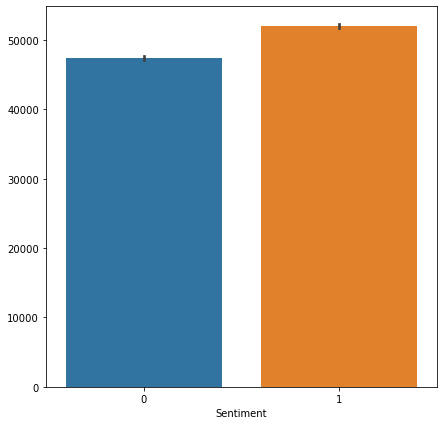

In [6]:
plt.figure(figsize=(7, 7))
sns.barplot(x="Sentiment", y=dataset.index, data=dataset)
plt.show()


In [7]:
dataset = dataset.rename(columns={"Sentiment": "Target","SentimentText": "Text"})
dataset = dataset.drop(columns=["ItemID"])
dataset


,Target,Text
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
99984,0,@Cupcake seems like a repeating problem hop...
99985,1,@cupcake__ arrrr we both replied to each other...
99986,0,@CuPcAkE_2120 ya i thought so
99987,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [8]:
def preprocess_text(text):
    text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+",'',text,flags=re.MULTILINE)
    text = re.sub(r"\@\w+|\#",'',text)
    text = text.translate(str.maketrans('','',string.punctuation))

    text_tokens = word_tokenize(text)
    filter_words = [w for w in text_tokens if not w in stop_words]

    return " ".join(filter_words)

In [9]:
dataset.Text = dataset["Text"].apply(preprocess_text)

In [10]:
dataset["Text"]

0                                           sad APL friend
1                                I missed New Moon trailer
2                                        omg already 730 O
3        Omgaga Im sooo im gunna CRy Ive dentist since ...
4                                  think mi bf cheating TT
                               ...                        
99984    seems like repeating problem hope youre able f...
99985    arrrr replied different tweets time ill see Du...
99986                                           ya thought
99987                                  Yes Yes Im glad fun
99988                                             haha yes
Name: Text, Length: 99989, dtype: object

In [11]:
vector = TfidfVectorizer(sublinear_tf=True)
vector = vector.fit(np.array(dataset.iloc[:,1]).ravel())
print(vector)

TfidfVectorizer(sublinear_tf=True)


In [12]:
X = vector.transform(np.array(dataset.iloc[:,1]).ravel())
y = np.array(dataset.iloc[:,0]).ravel()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [14]:
NB_model = MultinomialNB()
NB_model.fit(X_train,y_train)
y_predict_nb = NB_model.predict(X_test)
print(accuracy_score(y_test, y_predict_nb))


0.7356735673567357


In [15]:
LR_model = LogisticRegression(C=3, max_iter=1000, n_jobs=-1)
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))


0.7575257525752576


In [16]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_predict_rf = RF_model.predict(X_test)
print(accuracy_score(y_test, y_predict_rf))


0.7511751175117511


In [17]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_predict_svc = RF_model.predict(X_test)
print(accuracy_score(y_test, y_predict_svc))


0.7511751175117511
